In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your dataset
data = pd.read_csv('Ag_3_reduced.csv')

# Define input and output columns
input_cols = ['rad', 'gap', 'n2', 'lambda_val']
output_col = ['Ts']

# Split the data into input and output
X = data[input_cols]
y = data[output_col]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation = 'linear') 
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.3)

# Make predictions on the test set
y_pred = model.predict(X_test)



C:\Users\Bhavik Chandna\AppData\Local\Temp\ipykernel_17648\1278099548.py:9: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Ag_3_reduced.csv')


Epoch 1/5
50796/50796 [==============================] - 144s 3ms/step - loss: 58.7164 - val_loss: 4.8735
Epoch 2/5
50796/50796 [==============================] - 131s 3ms/step - loss: 9.2614 - val_loss: 21.8588
Epoch 3/5
50796/50796 [==============================] - 129s 3ms/step - loss: 5.4508 - val_loss: 3.6095
Epoch 4/5
50796/50796 [==============================] - 131s 3ms/step - loss: 4.6542 - val_loss: 12.7903
Epoch 5/5
31100/31100 [==============================] - 46s 1ms/step


In [2]:
y_pred

array([[19.514843],
       [69.961784],
       [96.00268 ],
       ...,
       [85.077934],
       [89.26624 ],
       [85.49786 ]], dtype=float32)

In [3]:
y_test

Ts
3134331  19.421
384796   69.557
1230235  95.856
1852644  68.691
3080091  68.704
...         ...
1311153  76.007
680782   47.741
1110462  85.356
517987   90.229
507704   86.822

[995173 rows x 1 columns]

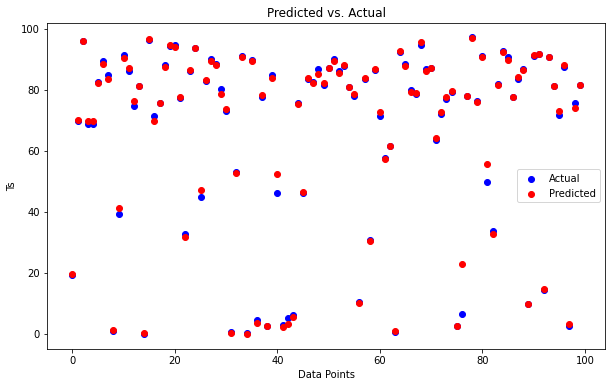

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(range(100), y_test[:100], color='blue', label='Actual')
plt.scatter(range(100), y_pred[:100], color='red', label='Predicted')
plt.xlabel('Data Points')
plt.ylabel('Ts')
plt.title('Predicted vs. Actual')
plt.legend()
plt.show()

In [5]:
model.save("regression_model.h5")
print("Model saved as 'regression_model.h5'")

Model saved as 'regression_model.h5'
